In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

NameError: name 'warnings' is not defined

In [22]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.shape

(150, 5)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [27]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
57,4.9,2.4,3.3,1.0,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
122,7.7,2.8,6.7,2.0,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
32,5.2,4.1,1.5,0.1,Iris-setosa
95,5.7,3.0,4.2,1.2,Iris-versicolor
78,6.0,2.9,4.5,1.5,Iris-versicolor
0,5.1,3.5,1.4,0.2,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica


In [28]:
df.duplicated().sum()

3

In [29]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [30]:
species_numeric = {'Iris-setosa':1 , 'Iris-versicolor':2 , 'Iris-virginica':3}
df.species = [species_numeric[i] for i in df.species]

In [31]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,3
91,6.1,3.0,4.6,1.4,2
99,5.7,2.8,4.1,1.3,2
110,6.5,3.2,5.1,2.0,3
130,7.4,2.8,6.1,1.9,3
68,6.2,2.2,4.5,1.5,2
7,5.0,3.4,1.5,0.2,1
55,5.7,2.8,4.5,1.3,2
78,6.0,2.9,4.5,1.5,2
13,4.3,3.0,1.1,0.1,1


{'whiskers': [<matplotlib.lines.Line2D at 0x15d69cb90>,
 'caps': [<matplotlib.lines.Line2D at 0x15d5b1450>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d7140d0>],
 'medians': [<matplotlib.lines.Line2D at 0x15d6217d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d622890>],
 'means': []}

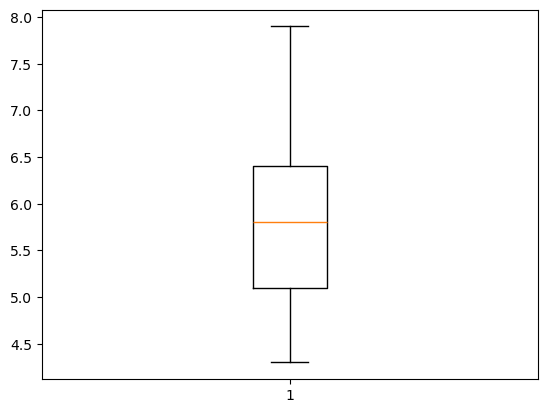

In [32]:
plt.boxplot(df['sepal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15c566c90>,
 'caps': [<matplotlib.lines.Line2D at 0x15d571890>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d6a5890>],
 'medians': [<matplotlib.lines.Line2D at 0x15d695750>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d696010>],
 'means': []}

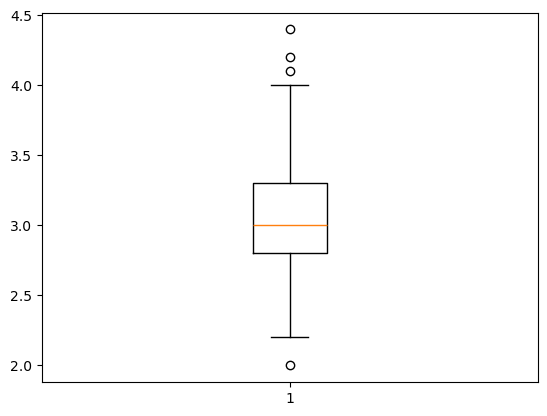

In [33]:
plt.boxplot(df['sepal_width'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15d78ef90>,
 'caps': [<matplotlib.lines.Line2D at 0x15d8f0790>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d78e510>],
 'medians': [<matplotlib.lines.Line2D at 0x15d8f1910>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d8f0510>],
 'means': []}

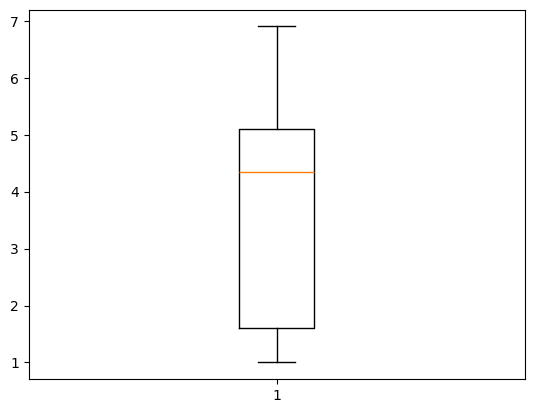

In [34]:
plt.boxplot(df['petal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15d94de90>,
 'caps': [<matplotlib.lines.Line2D at 0x15d94f0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d94d410>],
 'medians': [<matplotlib.lines.Line2D at 0x15d958210>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d958ad0>],
 'means': []}

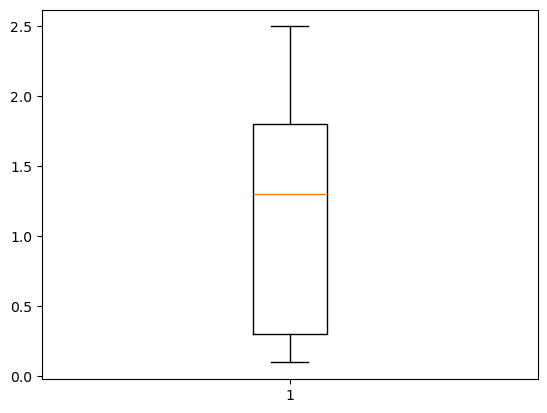

In [35]:
plt.boxplot(df['petal_width'])

<Axes: xlabel='species', ylabel='count'>

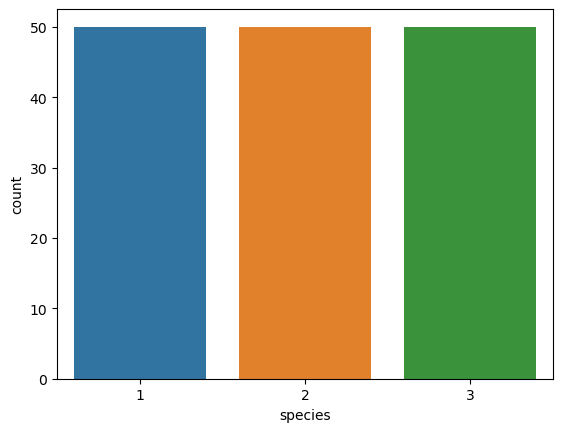

In [36]:
sns.countplot(x='species', data=df)

<Axes: >

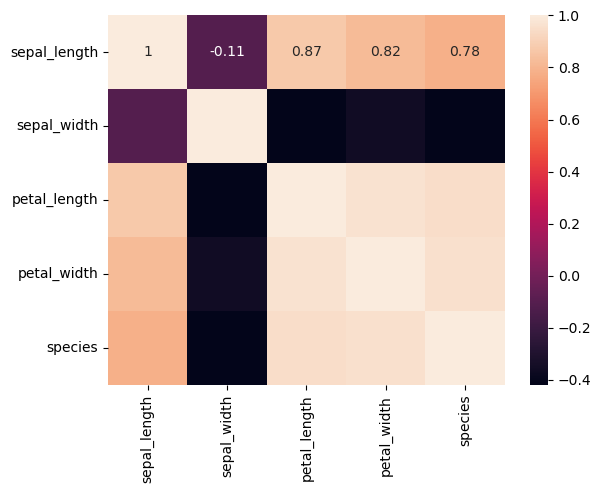

In [37]:
sns.heatmap(df.corr(),annot =True)

In [38]:
x = df.drop(columns=['species'])

y = df['species']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33 ,random_state =42)

In [40]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [41]:
model.score(x, y)

0.9304223675331595

In [42]:
model.coef_

array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

In [43]:
model.intercept_

1.1920839948281399

In [44]:
y_pred = model.predict(x_test)
print(y_pred)

[2.19756726 0.96731454 3.20111558 2.34168532 2.2654272  1.0335223
 2.05930184 2.85818604 2.35070534 2.05331264 2.71469034 0.91139498
 0.850745   0.91869693 0.98775914 2.39745639 3.00441822 2.02311961
 2.25705298 2.97884018 1.01991072 2.60005592 1.10011902 2.91785077
 2.82960982 2.90725851 2.76063251 3.04633725 1.0333738  1.01336062
 0.87698786 0.95635941 2.17232866 1.00008849 0.98473275 2.6839174
 2.2845166  0.92906772 0.92389183 0.84153404 2.75264018 2.38055451
 2.30141848 0.9660018  0.89827134 1.93212811 2.44938775 2.69891026
 2.18772685 3.15212358]


In [45]:
print("Mean squared error : %2f" % np.mean((y_pred - y_test) ** 2 ))

Mean squared error : 0.041322


In [46]:
results = np.column_stack((y_test, y_pred))


# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
          2.00 |          2.20
          1.00 |          0.97
          3.00 |          3.20
          2.00 |          2.34
          2.00 |          2.27
          1.00 |          1.03
          2.00 |          2.06
          3.00 |          2.86
          2.00 |          2.35
          2.00 |          2.05
          3.00 |          2.71
          1.00 |          0.91
          1.00 |          0.85
          1.00 |          0.92
          1.00 |          0.99
          2.00 |          2.40
          3.00 |          3.00
          2.00 |          2.02
          2.00 |          2.26
          3.00 |          2.98
          1.00 |          1.02
          3.00 |          2.60
          1.00 |          1.10
          3.00 |          2.92
          3.00 |          2.83
          3.00 |          2.91
          3.00 |          2.76
          3.00 |          3.05
          1.00 |          1.03
          1.00 |          1.01
     

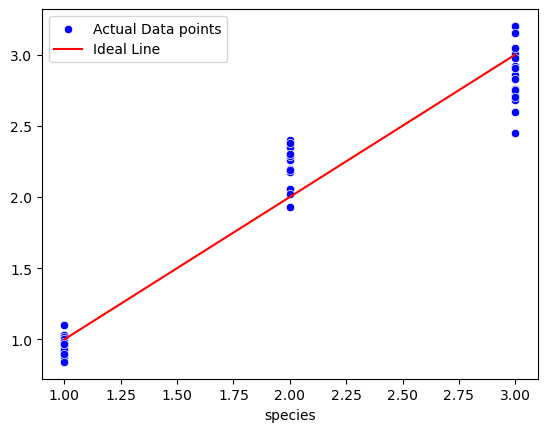

In [47]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()